In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE

In [55]:
cols = ['alcohol_by_weight', 'rating', 'bitterness', 'nitrogen', 'turbidity', 'sugars', 'degree_of_fermentation', 'calorific_value', 'density', 'pH', 'colour', 'sulphites']

cols_new = ['alcohol_by_weight', 'bitterness', 'nitrogen', 'turbidity', 'sugars', 'degree_of_fermentation', 'calorific_value', 'density', 'pH', 'colour', 'sulphites', 'rating']

In [56]:
df = pd.read_table("beer_ratings.txt", names = cols)

In [57]:
df = df[cols_new]

In [58]:
df.describe()

,alcohol_by_weight,bitterness,nitrogen,turbidity,sugars,degree_of_fermentation,calorific_value,density,pH,colour,sulphites,rating
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,4.964243,9.637821,0.628862,0.939390,16.305962,68.374036,18.389957,0.966954,3.803814,14.106389,14.020433,67.323718
std,0.521894,1.852364,0.187830,0.662604,8.465123,35.483428,10.147082,0.001937,0.157151,3.726049,10.288885,10.047955
min,4.000000,5.700000,0.220000,0.000000,7.560000,9.384000,4.000000,0.960640,3.240000,7.095000,1.875000,38.000000
25%,4.523810,8.300000,0.490000,0.332000,11.970000,55.522000,10.000000,0.965770,3.700000,11.825000,6.562500,60.000000
50%,4.809524,9.300000,0.620000,0.896400,13.860000,62.560000,16.000000,0.966935,3.800000,13.330000,11.250000,64.000000
75%,5.238095,10.700000,0.740000,1.494000,17.010000,71.944000,24.000000,0.968100,3.900000,15.748750,18.515625,74.000000
max,7.095238,17.000000,1.680000,3.320000,86.940000,477.020000,69.000000,0.973200,4.400000,43.000000,90.312500,94.000000


Now I need to split the data up into independent and dependent variables

In [59]:
MinMaxScaler =  MinMaxScaler()
df = pd.DataFrame(MinMaxScaler.fit_transform(df), columns = cols_new)

In [60]:
df.describe()

,alcohol_by_weight,bitterness,nitrogen,turbidity,sugars,degree_of_fermentation,calorific_value,density,pH,colour,sulphites,rating
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,0.311525,0.348480,0.280043,0.282949,0.110178,0.126145,0.221384,0.502736,0.486047,0.195276,0.137334,0.523638
std,0.168612,0.163926,0.128650,0.199579,0.106641,0.075878,0.156109,0.154232,0.135475,0.103775,0.116341,0.179428
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.169231,0.230088,0.184932,0.100000,0.055556,0.098662,0.092308,0.408439,0.396552,0.131737,0.053004,0.392857
50%,0.261538,0.318584,0.273973,0.270000,0.079365,0.113712,0.184615,0.501194,0.482759,0.173653,0.106007,0.464286
75%,0.400000,0.442478,0.356164,0.450000,0.119048,0.133779,0.307692,0.593949,0.568966,0.241018,0.188163,0.642857
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
X = df.iloc[:, :-1] # Independent Variables

In [62]:
y = df.iloc[:, -1] # Dependent Variables

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

When running the model on every variable we have, it doesn't produce a good result so I need to limit them based on how good they correlate with rating scores

Text(0.5, 1.0, 'Correlation Matrix')

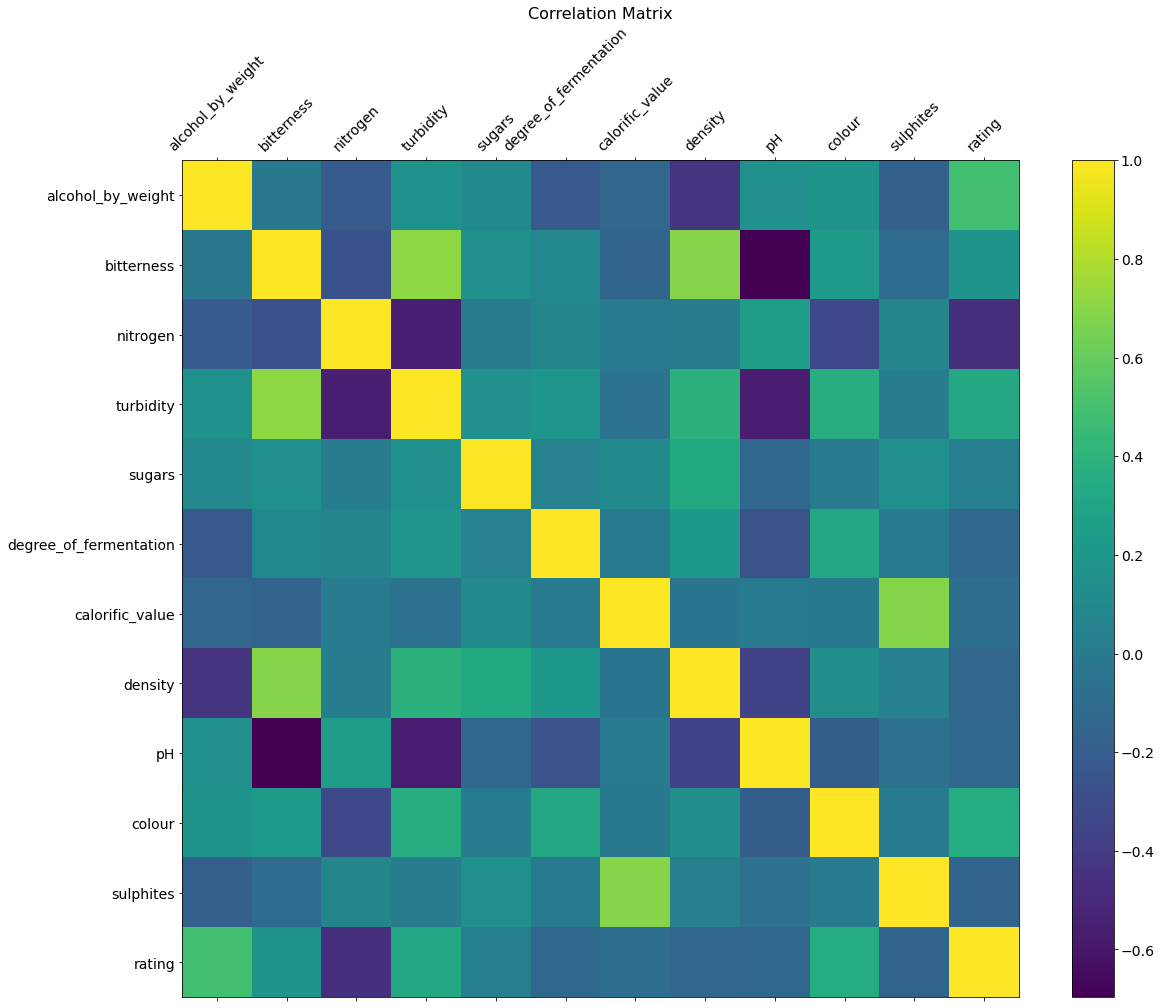

In [64]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum = f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize = 14, rotation = 45)
plt.yticks(range(df.shape[1]), df.columns, fontsize = 14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize = 14)
plt.title('Correlation Matrix', fontsize = 16)

I'm going to test it manually first by taking each variable and removing them one by one see which is doing the most damage, then I can remove again and again etc.

So what if we made a model with just these?

In [65]:
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 rating   R-squared (uncentered):                   0.929
Model:                            OLS   Adj. R-squared (uncentered):              0.928
Method:                 Least Squares   F-statistic:                              737.8
Date:                Mon, 21 Dec 2020   Prob (F-statistic):                        0.00
Time:                        22:43:32   Log-Likelihood:                          308.02
No. Observations:                 627   AIC:                                     -594.0
Df Residuals:                     616   BIC:                                     -545.2
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [66]:
print('Parameters: ', results.params)
print()
print('R2: ', results.rsquared)

Parameters:  alcohol_by_weight         0.445461
bitterness                0.415297
nitrogen                 -0.176439
turbidity                 0.048825
sugars                    0.030143
degree_of_fermentation    0.049822
calorific_value           0.147838
density                  -0.086368
pH                        0.385654
colour                    0.481801
sulphites                -0.065263
dtype: float64

R2:  0.929452348269292


In [67]:
predictions = results.predict(X_test)

In [68]:
prediction_error = y_test - predictions
prediction_error.mean()

0.0005226014609534801

In [69]:
lm = LinearRegression()
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
scores.mean()

0.34751857746081616

In [70]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 12))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)            

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11]}],
             return_train_score=True, scoring='r2', verbose=1)

In [71]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011966,0.002377,0.003292,0.001483,1,{'n_features_to_select': 1},-0.023362,0.174653,0.152330,0.077602,...,0.116380,0.081025,11,0.147607,0.195931,0.194789,0.148859,0.188975,0.175232,0.022174
1,0.006775,0.000260,0.001506,0.000100,2,{'n_features_to_select': 2},0.187891,0.333979,0.280975,0.182997,...,0.280805,0.089331,10,0.339261,0.363789,0.369952,0.272986,0.341074,0.337412,0.034415
2,0.006321,0.000304,0.001559,0.000216,3,{'n_features_to_select': 3},0.314940,0.381284,0.361434,0.359229,...,0.376537,0.049623,9,0.402719,0.402995,0.402274,0.407325,0.379982,0.399059,0.009711
3,0.007881,0.002560,0.001643,0.000076,4,{'n_features_to_select': 4},0.313851,0.391106,0.343804,0.365142,...,0.377408,0.054168,8,0.407333,0.404528,0.409748,0.410414,0.382455,0.402896,0.010427
4,0.006029,0.001388,0.001508,0.000123,5,{'n_features_to_select': 5},0.332457,0.401166,0.346605,0.369308,...,0.380641,0.043274,3,0.414175,0.413130,0.419934,0.414539,0.397990,0.411953,0.007371
5,0.004703,0.000292,0.001395,0.000019,6,{'n_features_to_select': 6},0.327204,0.392946,0.353035,0.368027,...,0.380235,0.045209,4,0.418604,0.418393,0.422149,0.418481,0.399923,0.415510,0.007921
6,0.004131,0.000102,0.001458,0.000145,7,{'n_features_to_select': 7},0.334473,0.395448,0.354512,0.372003,...,0.384044,0.044638,1,0.419650,0.420651,0.424463,0.419160,0.401762,0.417137,0.007910
7,0.003625,0.000121,0.001391,0.000025,8,{'n_features_to_select': 8},0.330119,0.394546,0.349105,0.362998,...,0.380098,0.046803,5,0.419963,0.421140,0.425245,0.423599,0.402122,0.418414,0.008352
8,0.003044,0.000009,0.001370,0.000006,9,{'n_features_to_select': 9},0.331179,0.392134,0.349405,0.371999,...,0.381215,0.045039,2,0.420053,0.421580,0.425249,0.424269,0.402431,0.418717,0.008351
9,0.002537,0.000055,0.001439,0.000156,10,{'n_features_to_select': 10},0.329184,0.391503,0.349270,0.366574,...,0.379622,0.045813,6,0.420268,0.421735,0.425354,0.424754,0.402457,0.418914,0.008440


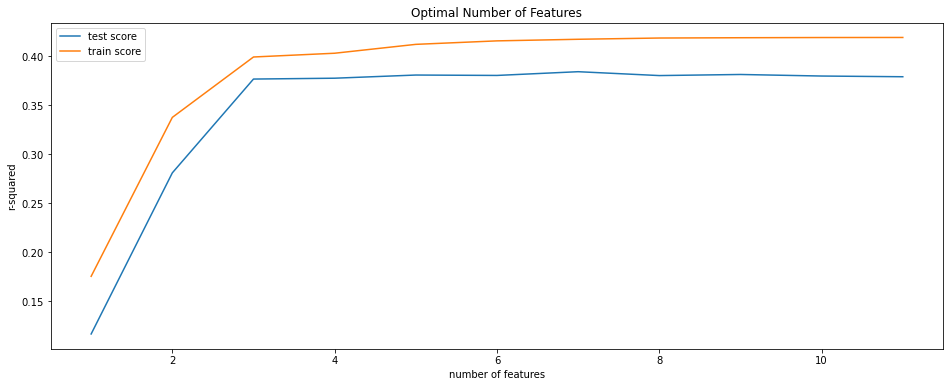

In [72]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [73]:
n_features_optimal = 11

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = metrics.r2_score(y_test, y_pred)
print(r2)

0.41767130035937106


#### Decision Tree

In [25]:
rt = DecisionTreeRegressor(max_depth = 5)
rt.fit(X_train, y_train)
y_pred = rt.predict(X_test) 

In [26]:
diff = y_test - y_pred

In [27]:
np.mean(diff)

-0.004543553262247466

In [28]:
rt.score(X_train, y_train)

0.5992581942587882

In [29]:
rt.score(X_test, y_test)

0.3254491687452531

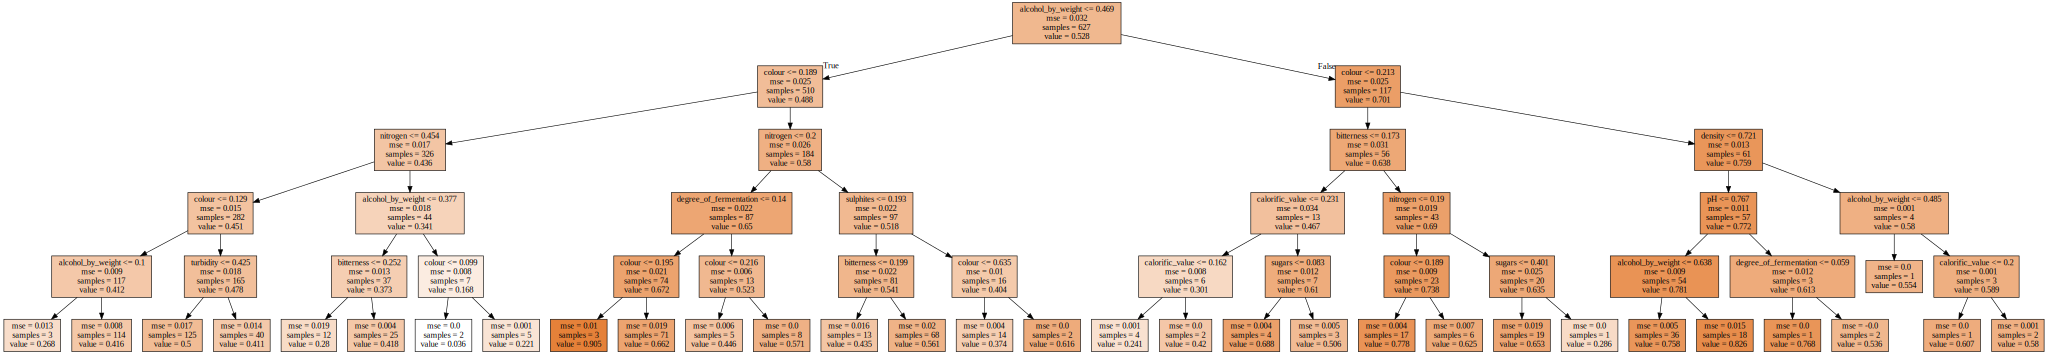

In [30]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(rt, feature_names = list(X), class_names = sorted(y.unique()), filled = True)
graphviz.Source(dot_data)

In [31]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 0.1081099192126764


In [32]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.021627169689433418


In [33]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 0.14706178867888633


In [34]:
print('R Squared Score is:', rt.score(X_train, y_train))

R Squared Score is: 0.5992581942587882


In [35]:
for importance, name in sorted(zip(rt.feature_importances_, X_train.columns), reverse = True):
    print (f'{name}:', f'{round(100 * importance, 2)}%') 

alcohol_by_weight: 38.96%
colour: 30.28%
nitrogen: 11.35%
bitterness: 6.81%
calorific_value: 2.91%
degree_of_fermentation: 2.31%
sulphites: 2.06%
turbidity: 1.99%
sugars: 1.53%
density: 1.14%
pH: 0.66%


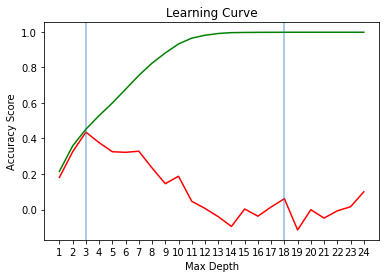

In [36]:
l = []
n = []
m = []
for i in range(1, 25):
    n.append(i)
    rt = DecisionTreeRegressor(max_depth = i)
    rt.fit(X_train, y_train)
    l.append(rt.score(X_train, y_train))
    m.append(rt.score(X_test, y_test))
plt.plot(n, l, 'g-')
plt.plot(n, m, 'r-')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve')
plt.axvline(x = 18, alpha = 0.5)
plt.axvline(x = 3, alpha = 0.5)
plt.xticks(np.arange(1,25))
plt.show()

The model is clearly overfitted past a max depth of 3

Need to do some cross validation 

In [37]:
from sklearn.model_selection import cross_val_score

In [44]:
scores = cross_val_score(rt, X_test, y_test, cv=5, scoring='r2')

In [45]:
scores.mean()

0.09889707860837701